##Installation

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()


✨🍰✨ Everything looks OK!


In [2]:
!conda create -n SDAL python=3.10 -y
!source /usr/local/etc/profile.d/conda.sh && conda activate SDAL

!conda install -c conda-forge root=6.28.10 -y

import os
os.environ["PATH"] = "/usr/local/envs/SDAL/bin:" + os.environ["PATH"]
os.environ["PYTHONPATH"] = "/usr/local/envs/SDAL/lib/python3.10/site-packages"


Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/SDAL

  added / updated specs:
    - python=3.10


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    ld_impl_linux-64-2.43      |       h712a8e2_4         656 KB  conda-forge
    libffi-3.4.6               |       h2dba641_1          56 KB  conda-forge
    libgcc-14.2.0              |       h767d61c_2         828 KB  conda-forge
    libgcc-ng-14.2.0           |       h69a702a_2          52 KB  conda-forge
    libgomp-14.2.0             |       h767d61c_2         449 KB  conda-forge
   

##START HERE


$$
\LARGE \color{red}{\textbf{! If the session crashes, please start from here. !}}
$$

In [3]:
import ROOT
import math
print(ROOT.gROOT.GetVersion())

Welcome to JupyROOT 6.28/10
6.28/10


The `TRatioPlot` class in `ROOT`, by default, uses the `TGraphAsymmErrors::Divide` method to compute the ratio of two histograms. When the **divsym** option is specified, it uses the `TH1::Divide` method, which assumes symmetric errors for the ratio calculation.

In this context we will review ONLY the use of `TRatioPlot` with the **divsym** option, and the uncertainties will be symmetric.
Note: for those more curious, in the additional material of the corresponding ppt slides you can see a full comparison of **div** and **Divsym** approaches.

When plotting with **TRatioPlot** in ROOT, based on the example provided in the official ROOT documentation (https://root.cern.ch/doc/master/classTRatioPlot.html), by using the **divsym** option, the method `sumw2` should be applied to properly account for the errors, even though the official documentation does not explicitly mention it. Using `sumw2` (for one of the histograms) with the **divsym** option ensures accurate error propagation, which would otherwise be incorrect without it, as we have seen in the previous exercise (2a) using directly the **Divide** method.

We will verify that with `sumw2` applied, the uncertainty results are in perfect agreement with the manual calculations; conversely, if `sumw2` is not used, the error values will differ significantly from the expected ones.

## **Manual Calculation**

We start with the same manul calculation of part (2a):

In [21]:
def manual_calculation(numerator, denumerator):
    if numerator == 0 or denumerator == 0:
        return 0, 0
    ratio_manual = numerator / denumerator
    sigma_numerator_manual = math.sqrt(numerator)  # Poisson error approximation: sqrt(A)
    sigma_denumerator_manual = math.sqrt(denumerator)  # Poisson error approximation: sqrt(B)

    # Gaussian error propagation formula
    sigma_R_manual = ratio_manual * math.sqrt((sigma_numerator_manual / numerator) ** 2 + (sigma_denumerator_manual / denumerator) ** 2)

    return ratio_manual, sigma_R_manual, sigma_numerator_manual, sigma_denumerator_manual

numerator_manual = [85, 91, 79, 89, 93, 77, 85, 81, 87, 90]
denumerator_manual = [80, 90, 85, 95, 82, 87, 79, 86, 93, 91]
num_bins_manual = len(numerator_manual)

# Initialize empty lists to store manual results
ratios_manual = []
errors_manual = []
sigma_numerator_manual = []
sigma_denumerator_manual = []

# For each bin, calculate ratio and error
for i in range(num_bins_manual):
    A = numerator_manual[i]
    B = denumerator_manual[i]

    # Call the manual_calculation function
    ratio_manual, error_manual, sigma_numerator, sigma_denumerator = manual_calculation(A, B)

    # Store the results
    ratios_manual.append(ratio_manual)
    errors_manual.append(error_manual)
    sigma_numerator_manual.append(sigma_numerator)
    sigma_denumerator_manual.append(sigma_denumerator)


'\ncanvas_manual = ROOT.TCanvas("canvas_manual", "Manual Calculation of Ratio", 800, 600)\n\n# Create a TGraphErrors object for the manual ratio plot\ngraph_manual = ROOT.TGraphErrors(num_bins_manual)\n\n# Add the calculated ratio and errors to the graph\nfor i in range(num_bins_manual):\n    graph_manual.SetPoint(i, i + 1, ratios_manual[i])  # X: bin number, Y: ratio\n    graph_manual.SetPointError(i, 0, errors_manual[i])  # Y error: computed error\n\ngraph_manual.SetTitle("Manual Calculation of Ratio")\ngraph_manual.GetXaxis().SetTitle("Bin Number")\ngraph_manual.GetYaxis().SetTitle("Ratio (Manual)")\n\ngraph_manual.Draw("AP")\ncanvas_manual.Draw()\ncanvas_manual.SaveAs("manual_calculation_ratio.png")\n'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_manual
Warning in <TROOT::Append>: Replacing existing TH1: hist_numerator_manual (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_denumerator_manual (Potential memory leak).
Info in <TCanvas::Print>: png file manual_calculation_ratio_with_histograms.png has been created


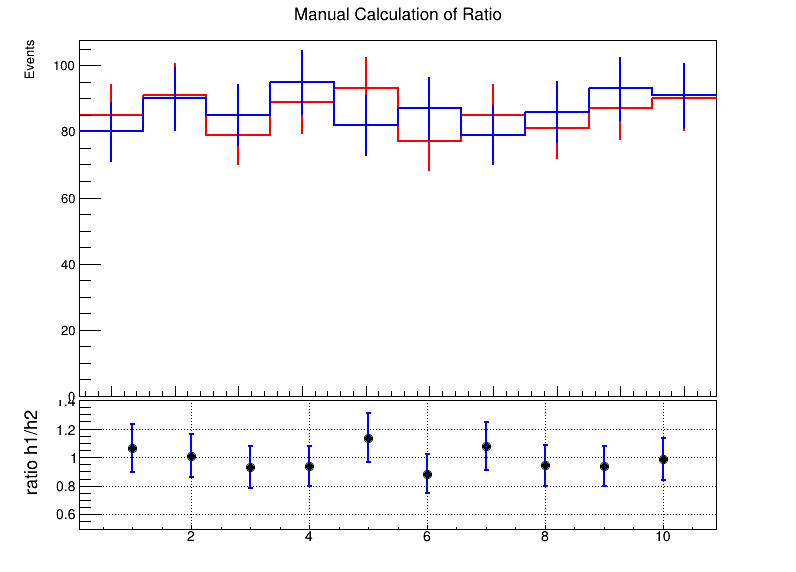

In [20]:
#Just to create similar canvas as in Divide() method as in exercise 2a:

canvas_manual = ROOT.TCanvas("canvas_manual", "Manual Calculation of Ratio", 800, 600)

# Upper pad for the numerator and denominator histograms
pad1_manual = ROOT.TPad("pad1_manual", "pad1_manual", 0, 0.3, 1, 1)
pad1_manual.SetBottomMargin(0.01)
pad1_manual.Draw()
pad1_manual.cd()

hist_numerator_manual = ROOT.TH1F("hist_numerator_manual", "Numerator; Bin Number; Events", num_bins_manual, 0.5, num_bins_manual + 0.5)
hist_denumerator_manual = ROOT.TH1F("hist_denumerator_manual", "Denominator; Bin Number; Events", num_bins_manual, 0.5, num_bins_manual + 0.5)
hist_numerator_manual.SetMinimum(0)
hist_denumerator_manual.SetMinimum(0)
hist_numerator_manual.SetStats(0)
hist_numerator_manual.GetXaxis().SetLabelSize(0.0)

for i in range(num_bins_manual):
    hist_numerator_manual.SetBinContent(i + 1, numerator_manual[i])
    hist_denumerator_manual.SetBinContent(i + 1, denumerator_manual[i])

hist_numerator_manual.SetLineColor(ROOT.kRed)
hist_numerator_manual.SetLineWidth(2)
hist_numerator_manual.SetTitle("Manual Calculation of Ratio")

hist_denumerator_manual.SetLineColor(ROOT.kBlue)
hist_denumerator_manual.SetLineWidth(2)

hist_numerator_manual.Draw("EHIST")
hist_denumerator_manual.Draw("EHIST SAME")

canvas_manual.cd()
pad2_manual = ROOT.TPad("pad2_manual", "pad2_manual", 0, 0.05, 1, 0.3)
pad2_manual.SetTopMargin(0)
pad2_manual.SetBottomMargin(0.1)
pad2_manual.SetGridx()
pad2_manual.SetGridy()
pad2_manual.Draw()
pad2_manual.cd()

graph_manual = ROOT.TGraphErrors(num_bins_manual)

for i in range(num_bins_manual):
    graph_manual.SetPoint(i, i + 1, ratios_manual[i])  # X: bin number, Y: ratio
    graph_manual.SetPointError(i, 0, errors_manual[i])  # Y error: computed error

graph_manual.SetTitle("")
graph_manual.GetXaxis().SetTitle("Bin Number")
graph_manual.GetYaxis().SetTitle("Ratio (Manual)")

graph_manual.SetLineColor(ROOT.kBlue)
graph_manual.SetLineWidth(2)

y_manual = graph_manual.GetYaxis()
y_manual.SetTitle("ratio h1/h2 ")
y_manual.SetNdivisions(505)
y_manual.SetTitleSize(20)
y_manual.SetTitleFont(43)
y_manual.SetTitleOffset(1.55)
y_manual.SetLabelFont(43)
y_manual.SetLabelSize(15)

# Adjust x-axis settings
x_manual = graph_manual.GetXaxis()

x_manual.SetTitleSize(20)
x_manual.SetTitleFont(43)
x_manual.SetTitleOffset(4.0)
x_manual.SetLabelFont(43)
x_manual.SetLabelSize(15)

graph_manual.SetMarkerStyle(20)
graph_manual.SetMarkerSize(1.1)
graph_manual.SetMaximum(1.4)
graph_manual.SetMinimum(0.5)
graph_manual.Draw("AP")

canvas_manual.Update()
canvas_manual.Draw()

canvas_manual.SaveAs("manual_calculation_ratio_with_histograms.png")

In [55]:
print("Manual calculation method\n")
print(f"{'Bin':^5} | {'Ratio':^7} | {'± Error':^7} |")
print("-" * 30)

for i in range(num_bins_manual):
    print(f"{i+1:^5} | {ratios_manual[i]:^7.4} | {errors_manual[i]:^7.4} |")

Manual calculation method

 Bin  |  Ratio  | ± Error |
------------------------------
  1   |  1.062  | 0.1655  |
  2   |  1.011  | 0.1503  |
  3   | 0.9294  | 0.1452  |
  4   | 0.9368  | 0.1382  |
  5   |  1.134  | 0.1718  |
  6   | 0.8851  | 0.1385  |
  7   |  1.076  | 0.1681  |
  8   | 0.9419  | 0.1458  |
  9   | 0.9355  | 0.1395  |
 10   |  0.989  |  0.147  |


## **TRatioPlot (divsym) Symmetric Option**

Warning in <TROOT::Append>: Replacing existing TH1: hist_numerator_tratio_sym (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_denumerator_tratio_sym (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_tratio_sym
Info in <TCanvas::Print>: png file TRatioPlot_DivSym_Method_Manual_vs_Div.png has been created


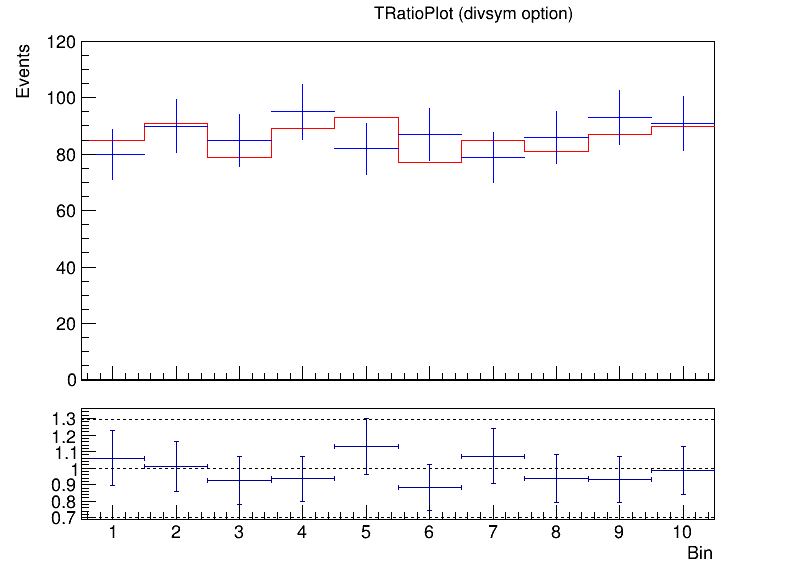

In [73]:
numerator_tratio_sym = [85, 91, 79, 89, 93, 77, 85, 81, 87, 90]
denumerator_tratio_sym = [80, 90, 85, 95, 82, 87, 79, 86, 93, 91]

num_bins_tratio_sym = len(numerator_tratio_sym)

# Create histograms for numerator and denominator
hist_numerator_tratio_sym = ROOT.TH1F("hist_numerator_tratio_sym", "Numerator; Bin Number; Events", num_bins_tratio_sym, 0.5, num_bins_tratio_sym + 0.5)
hist_denumerator_tratio_sym = ROOT.TH1F("hist_denumerator_tratio_sym", "Denominator; Bin Number; Events", num_bins_tratio_sym, 0.5, num_bins_tratio_sym + 0.5)

hist_numerator_tratio_sym.SetMinimum(0)
hist_numerator_tratio_sym.SetMaximum(120)
hist_numerator_tratio_sym.SetStats(0)
hist_denumerator_tratio_sym.SetMinimum(0)
hist_denumerator_tratio_sym.SetMaximum(120)

for i in range(num_bins_tratio_sym):
    hist_numerator_tratio_sym.SetBinContent(i + 1, numerator_tratio_sym[i])
    hist_denumerator_tratio_sym.SetBinContent(i + 1, denumerator_tratio_sym[i])

hist_numerator_tratio_sym.Sumw2()   # crucial to turn on (at least for one of the two)
# hist_denumerator_tratio_sym.Sumw2()

# Create the TRatioPlot using the Divide method
canvas_tratio_sym = ROOT.TCanvas("canvas_tratio_sym", "TRatioPlot (divsym option)", 800, 600)
ratio_plot_tratio_sym = ROOT.TRatioPlot(hist_numerator_tratio_sym, hist_denumerator_tratio_sym, "divsym")  # div_sym option

ratio_plot_tratio_sym.Draw()
canvas_tratio_sym.Update()

hist_numerator_tratio_sym.SetTitle(f"TRatioPlot (divsym option);Bin;Events")
hist_numerator_tratio_sym.SetLineColor(ROOT.kRed)
hist_denumerator_tratio_sym.SetLineColor(ROOT.kBlue)
canvas_tratio_sym.cd()

ratio_plot_tratio_sym.GetLowerPad().cd()
ratio_plot_tratio_sym.GetLowerPad().Update()
tratio_divsym_low = ratio_plot_tratio_sym.GetLowerRefGraph()

canvas_tratio_sym.Draw()
canvas_tratio_sym.SaveAs("TRatioPlot_DivSym_Method_Manual_vs_Div.png")

In [40]:
if tratio_divsym_low.InheritsFrom("TGraphAsymmErrors"):
    print("The method used is 'div'.")
else:
    print("The method used is 'divsym'.")

The method used is 'divsym'.


In [41]:
ratios_tratio_sym = [tratio_divsym_low.GetY()[i] for i in range(num_bins_tratio_sym)]

errors_tratio_sym = [tratio_divsym_low.GetEYlow()[i] if tratio_divsym_low.InheritsFrom("TGraphAsymmErrors") else tratio_divsym_low.GetEY()[i] for i in range(num_bins_tratio_sym)]

print("TRatio DivSym method\n")

print(f"{'Bin':^5} | {'Ratio':^7} |{'± Error':^7} | ")
print("-" * 27)

for i in range(num_bins_tratio_sym):
    print(f"{i + 1:^5} | {ratios_tratio_sym[i]:^7.4f} |±{errors_tratio_sym[i]:^6.4f} |")

TRatio DivSym method

 Bin  |  Ratio  |± Error | 
---------------------------
  1   | 1.0625  |±0.1655 |
  2   | 1.0111  |±0.1503 |
  3   | 0.9294  |±0.1452 |
  4   | 0.9368  |±0.1382 |
  5   | 1.1341  |±0.1718 |
  6   | 0.8851  |±0.1385 |
  7   | 1.0759  |±0.1681 |
  8   | 0.9419  |±0.1458 |
  9   | 0.9355  |±0.1395 |
 10   | 0.9890  |±0.1470 |


## **Compare the results of TRatioPlot class with divsym option and of the Manual Calculation**

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_all_ratios
Info in <TCanvas::Print>: png file manual_vs_tratiodiv_vs_sym_combined.png has been created


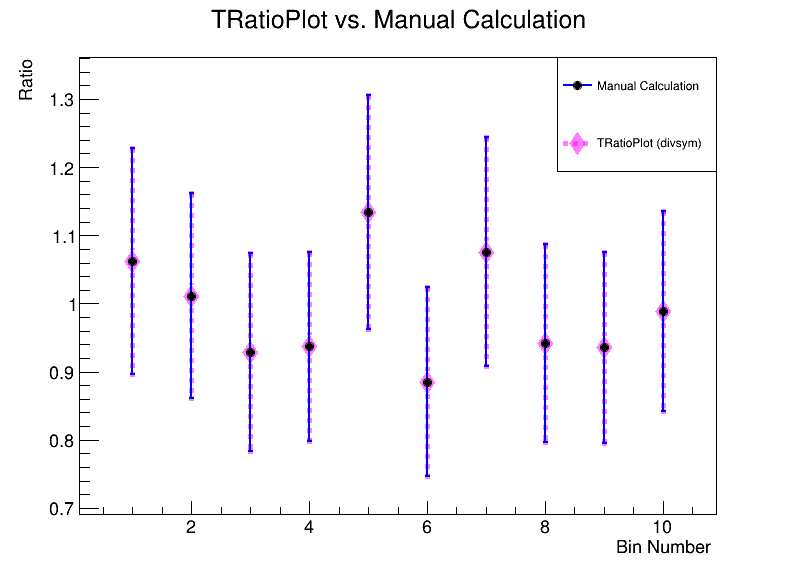

In [42]:
canvas_all_ratios = ROOT.TCanvas("canvas_all_ratios", "Manual vs TRatio (div) vs TRatio (divsym)", 800, 600)

graphic_tratio_sym = ROOT.TGraphErrors(num_bins_tratio_sym)

for i in range(num_bins_tratio_sym):
    graphic_tratio_sym.SetPoint(i, i + 1, ratios_tratio_sym[i])  # X: bin number, Y: ratio
    graphic_tratio_sym.SetPointError(i, 0, errors_tratio_sym[i])  # Same error for low and up

# Set properties for TRatio plot :
graphic_tratio_sym.SetTitle("TRatioPlot vs. Manual Calculation")
graphic_tratio_sym.GetXaxis().SetTitle("Bin Number")
graphic_tratio_sym.GetYaxis().SetTitle("Ratio")
graphic_tratio_sym.SetMarkerColorAlpha(ROOT.kMagenta, 0.5)  # 50% transparency
graphic_tratio_sym.SetLineColorAlpha(ROOT.kMagenta, 0.5)  # 50% transparency
graphic_tratio_sym.SetMarkerStyle(33)
graphic_tratio_sym.SetMarkerSize(3)
graphic_tratio_sym.SetLineWidth(5)
graphic_tratio_sym.SetLineStyle(7)

graphic_tratio_sym.Draw("AP")  # Draw TRatio plot
#
# Superimpose the manual graph on the same canvas
graph_manual.Draw("P SAME")

legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(graph_manual, "Manual Calculation", "pl")
legend.AddEntry(graphic_tratio_sym, "TRatioPlot (divsym)", "pl")
legend.Draw()

canvas_all_ratios.Update()
canvas_all_ratios.Draw()
canvas_all_ratios.SaveAs("manual_vs_tratio-divsym.png")
